In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def findBestFitPoly(degree: int, xs: list, ys: list) -> list:
  """
    takes a list of x values and corresponding y values and a degree and finds
    the best fit polynomial of that degree
  """
  if degree >= len(xs):
    print(f"cannot make a degree {degree} polynomial with only {len(xs)} points")
    return # technically the program would run but force it to not do so

  degree = degree+1

  matrixA = [[x**i for i in range(degree)] for x in xs] # set up A matrix

  matrixQ, matrixR = np.linalg.qr(matrixA) # find QR decomposition

  coefficients = (np.linalg.inv(matrixR) @ matrixQ.T) @ ys # (R^-1)(Q^*)y
  clampFloats(coefficients) # kill floating point zeroes

  return coefficients

In [ ]:
def printMat(matrix: list) -> None:
  """
    prints a matrix in a nice way :)
  """
  for row in matrix:
    for elt in row:
      print(elt, end=" ")
    print("")

In [ ]:
def printVect(vector: list) -> None:
  """
    prints a vector in a nice way :)
  """
  for elt in vector:
    print(elt)

In [ ]:
def clampFloats(vector: list) -> None:
  """
    clamps floats below 1e-12 to 0
  """
  for i,elt in enumerate(vector):
    if abs(elt) < 1e-12:
      vector[i] = 0


In [ ]:
def __stringRep(coefficients):
  """
    creates a string representation of the polynomial given coefficients
  """
  coefficients = list(coefficients)

  degree = len(coefficients)
  stringRep = ""
  exp = degree-1
  while len(coefficients) > 0:
    stringRep += str("(" + str(coefficients.pop())) + ")x^" + str(exp)
    exp -= 1
    if len(coefficients) > 0: # add plus if this isn't the last elt
      stringRep += " + "
  return stringRep

In [ ]:
def plot(xs, ys, coefs):
  """
    plots a set of x,y points against a function with given coefficients
  """
  plt.scatter(xs, ys)
  outXs, outYs = createFunctionOut(coefs, min(xs)-1, max(xs)+1)
  plt.plot(outXs, outYs)
  plt.show()

In [ ]:
def createFunctionOut(coefs, start, end):
  """
    takes coefficients, a start and an end point and generates a list of xs
    and ys created by that function.
  """
  xs = []
  ys = []
  for i in range(math.floor(start)*10, math.ceil(end)*10):
    xVal = i/10
    xs.append(xVal)
    yVal = 0
    for j in range(len(coefs)):
      yVal += coefs[j]*xVal**j
    ys.append(yVal)
  return xs, ys

+===========================================+
|               y = x^3 - x^2               |
+===========================================+
(0.0)x^4 + (1.0)x^3 + (-1.0000000000000007)x^2 + (0.0)x^1 + (0.0)x^0


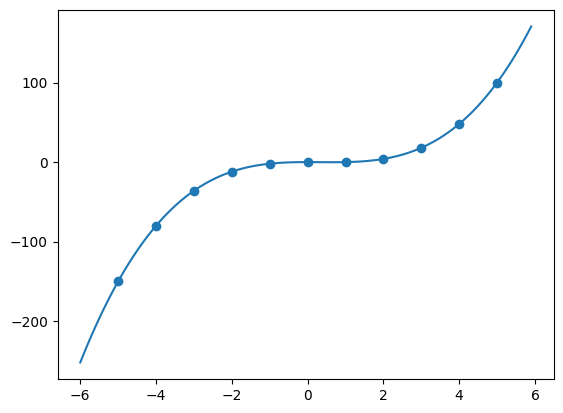

In [ ]:
if __name__ == "__main__":
  print("+===========================================+")
  print("|               y = x^3 - x^2               |")
  print("+===========================================+")
  # y = x^3-x^2
  xs = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
  ys = [-150, -80, -36, -12, -2, 0, 0, 4, 18, 48, 100]

  coefs = findBestFitPoly(4, xs, ys)
  print(__stringRep(coefs))

  plot(xs, ys, coefs)

+===========================================+
|   y = 0.00001x^4-0.05x^3+0.667x^2-0.25x   |
+===========================================+
(1.000547449903598e-05)x^4 + (-0.05000007765034563)x^3 + (0.666666669401331)x^2 + (-0.24999710438284872)x^1 + (-8.687495527577582e-07)x^0


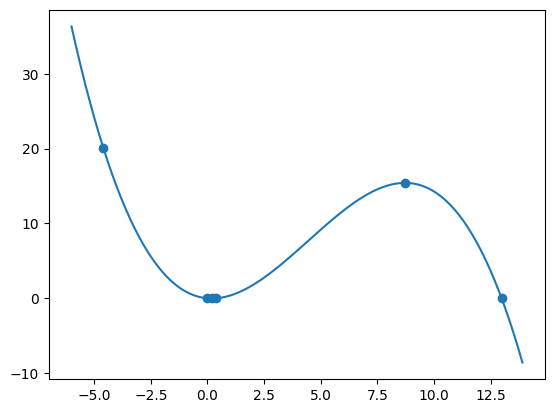

In [ ]:
if __name__ == "__main__":
  print("+===========================================+")
  print("|   y = 0.00001x^4-0.05x^3+0.667x^2-0.25x   |")
  print("+===========================================+")
  # 0.00001x^{4}-0.05x^{3}+\frac{2}{3}x^{2}-\frac{1}{4}x
  xs = [0, 0.38618, 0.19163, 8.71798, -4.6, 12.98189]
  ys = [0, 0, -0.02378, 15.41735, 20.12794, 0]

  coefs = findBestFitPoly(4, xs, ys)
  print(__stringRep(coefs))

  plot(xs, ys, coefs)